# Projeto 8: Classificação de sinais de trânsito

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
from sklearn.utils import shuffle

tf.__version__

'2.8.0'

# Etapa 2: Importação da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Deep learning/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [5]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [6]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
X_validation.shape

(4410, 32, 32, 3)

# Etapa 3: Visualização dos dados

1

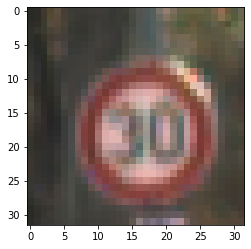

In [11]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

35

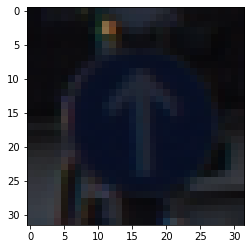

In [12]:
i = 3100
plt.imshow(X_test[i])
y_test[i]

7

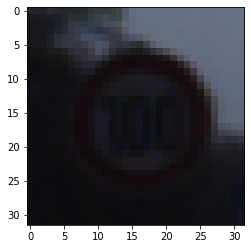

In [13]:
i = 3100
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4: Preparação dos dados

In [14]:
#misturando os dados
X_train, y_train = shuffle(X_train, y_train)

In [15]:
#transformando em escala de cinza(canal unico de cores)
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [18]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [19]:
#normalizando os dados(poderia ser usado MinMaxScaler)
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [20]:
np.max(X_train_gray_norm)

0.9921875

In [21]:
np.min(X_train_gray_norm)

-0.9713541666666666

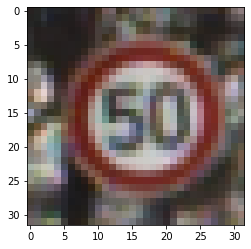

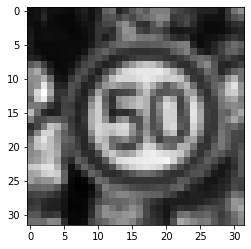

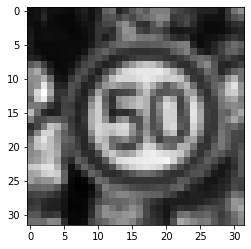

In [22]:
i = 3100
#squeeze =~ reshape
#img original
plt.imshow(X_train[i])
plt.figure()
#img com escala de cinza
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
#img escala de cinza normalizada
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

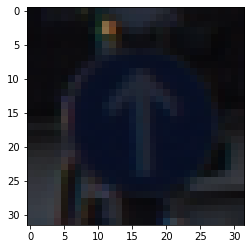

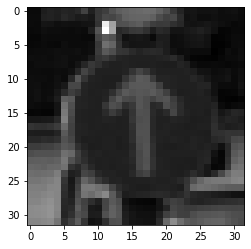

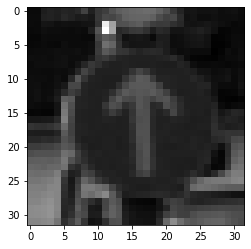

In [23]:
i = 3100
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

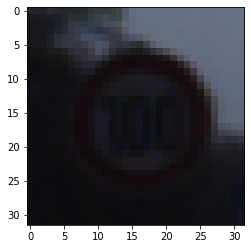

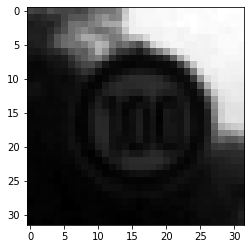

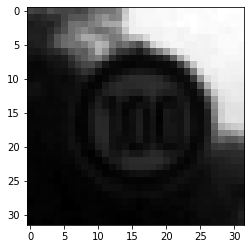

In [24]:
i = 3100
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Etapa 5: Criação do modelo e treinamento

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [25]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [26]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [27]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 12s 11ms/step - loss: 3.2214 - accuracy: 0.1531 - val_loss: 2.8436 - val_accuracy: 0.2812
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7705 - accuracy: 0.5011 - val_loss: 1.6100 - val_accuracy: 0.5381
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 1.0542 - accuracy: 0.6933 - val_loss: 1.2455 - val_accuracy: 0.6324
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.7747 - accuracy: 0.7753 - val_loss: 1.0218 - val_accuracy: 0.6955
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6187 - accuracy: 0.8256 - val_loss: 0.9057 - val_accuracy: 0.7261
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.5184 - accuracy: 0.8544 - val_loss: 0.8318 - val_accuracy: 0.7556
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 0.8790 - val_loss: 0.8193 - val_accuracy: 0.7512
Epoch 8/50
70/70 [

# Etapa 6: Avaliação do modelo

In [28]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.5385 - accuracy: 0.8352
Test Accuracy: 0.8352335691452026


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_accuracy

[0.28117913007736206,
 0.538095235824585,
 0.6324263215065002,
 0.6954648494720459,
 0.7260770797729492,
 0.7555555701255798,
 0.7512471675872803,
 0.7757369875907898,
 0.7927437424659729,
 0.7907029390335083,
 0.8154194951057434,
 0.8272109031677246,
 0.8176870942115784,
 0.8219954371452332,
 0.8151927590370178,
 0.8176870942115784,
 0.8244897723197937,
 0.823356032371521,
 0.839002251625061,
 0.8319727778434753,
 0.8328798413276672,
 0.8337868452072144,
 0.8265306353569031,
 0.8399093151092529,
 0.8385487794876099,
 0.8362811803817749,
 0.8281179070472717,
 0.8424036502838135,
 0.8317460417747498,
 0.8421768546104431,
 0.8308389782905579,
 0.8353741765022278,
 0.8485260605812073,
 0.8442176580429077,
 0.8530611991882324,
 0.8487528562545776,
 0.8521541953086853,
 0.8551020622253418,
 0.8455782532691956,
 0.8433106541633606,
 0.8326530456542969,
 0.8482993245124817,
 0.8476190567016602,
 0.8594104051589966,
 0.8541949987411499,
 0.8380952477455139,
 0.8535147309303284,
 0.840136051177

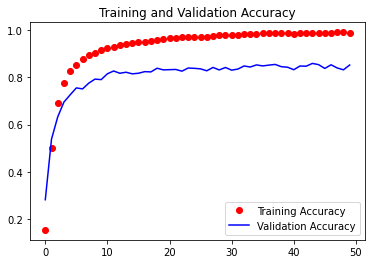

In [32]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

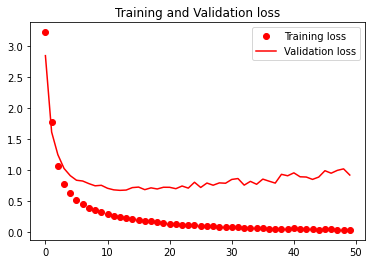

In [33]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [34]:
#predicted_classes = LeNet.predict_classes(X_test_gray_norm) -- Atualizado 17/01/22
#y_true = y_test

In [35]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

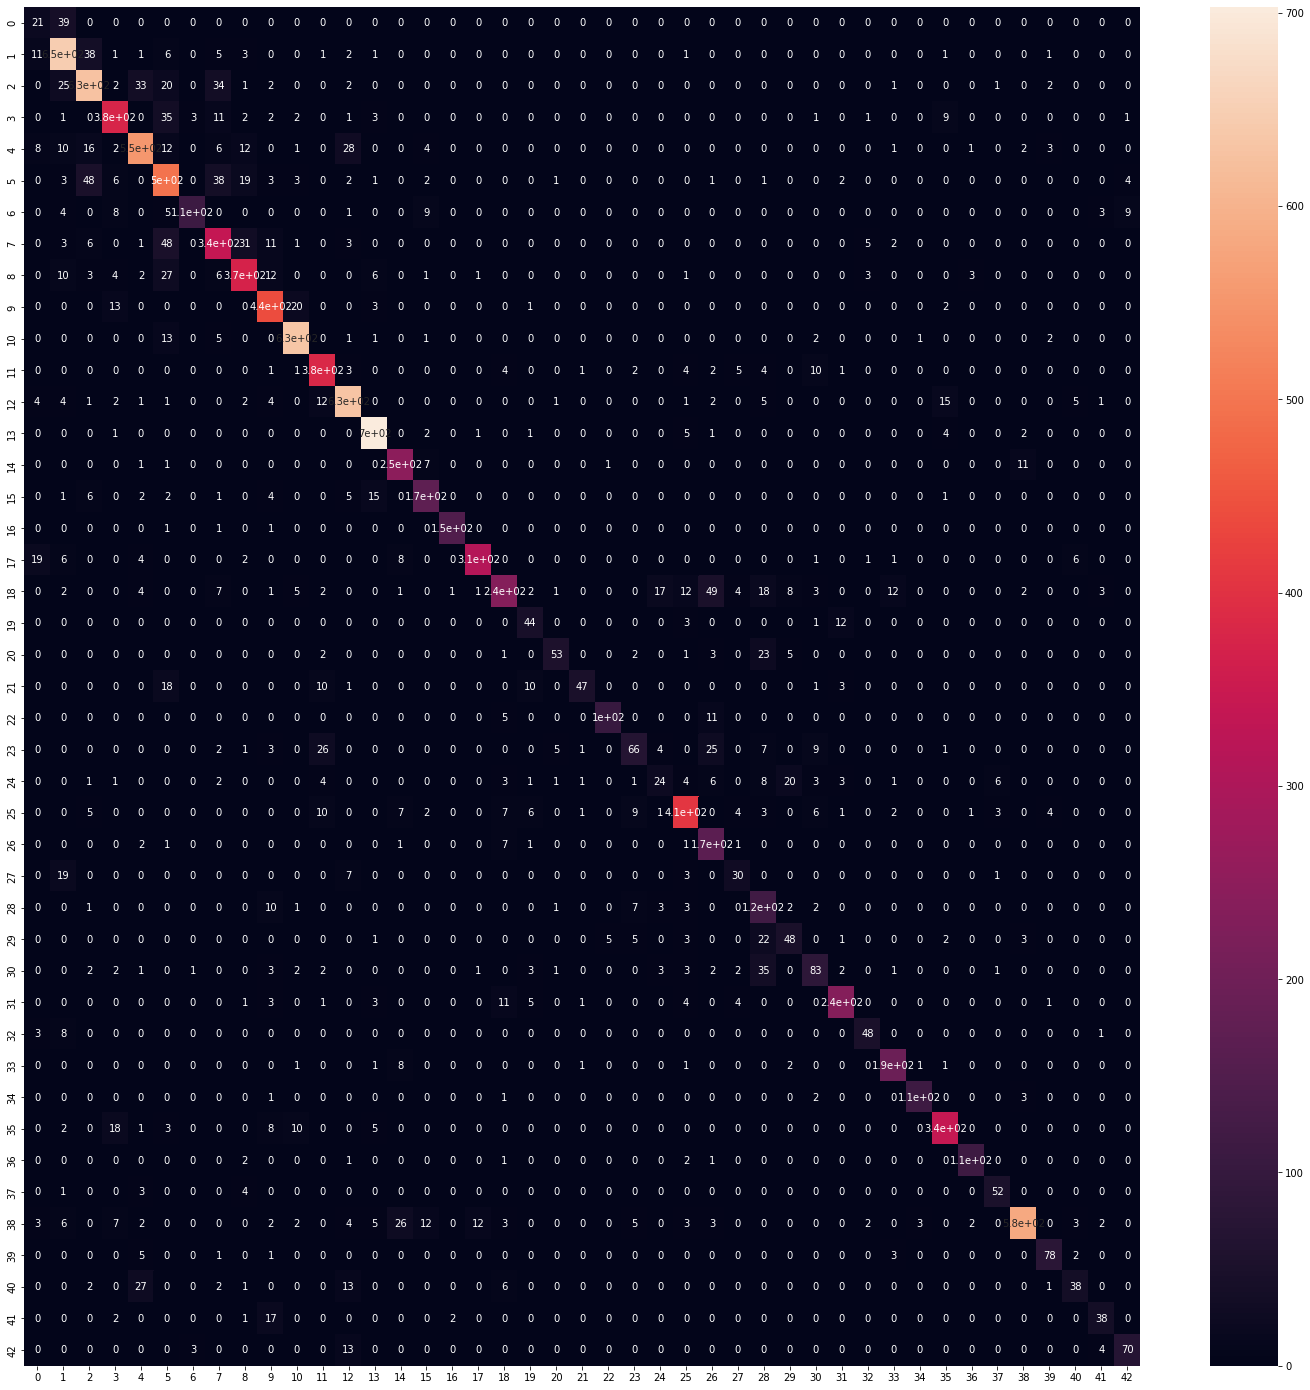

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

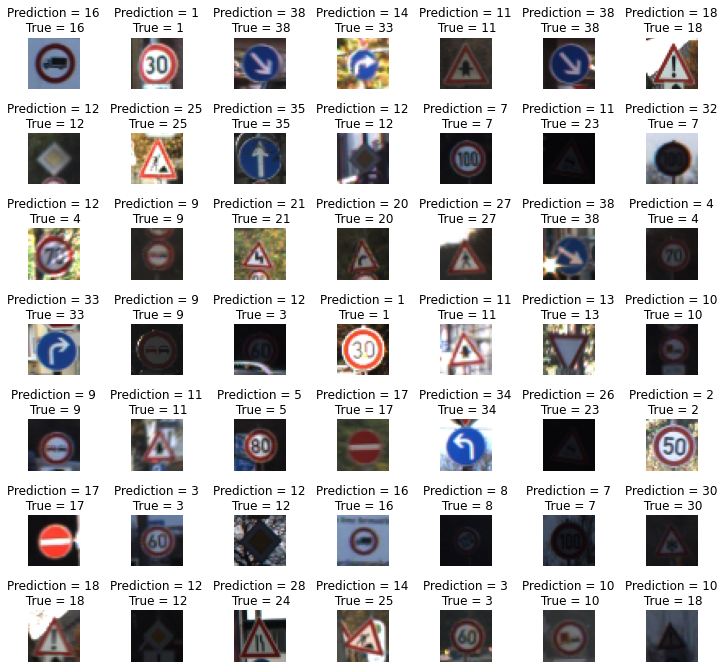

In [37]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    